<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Seminars/BioInf/S6_DimRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные методы ML

### Семинар 6: Методы понижения размерности. PCA

#### Визуализация транскриптомных данных. Анализ данных, выявление выбросов и батч-эффекта.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Визуализация транскриптомных данных

В этой задаче предлагается загрузить транскриптомные данные и произвести снижение размерности методом PCA.

**Загрузите датасет** (`gse53625_expression.csv`) и метаданные к нему (`gse53625_metadata.csv`).

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz -O gse53625.tar.gz
!tar xvzf gse53625.tar.gz

--2025-12-03 07:48:22--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1666446 (1.6M) [application/x-gzip]
Saving to: ‘gse53625.tar.gz’

gse53625.tar.gz     100%[===================>]   1.59M  2.77MB/s    in 0.6s    

2025-12-03 07:48:24 (2.77 MB/s) - ‘gse53625.tar.gz’ saved [1666446/1666446]

data/gse53625_expression.csv
data/gse53625_metadata.csv


In [ ]:
escc = pd.read_csv("./data/gse53625_expression.csv", index_col = 0)
escc_meta = pd.read_csv("./data/gse53625_metadata.csv", index_col = 0)

In [ ]:
escc.head(10)

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
89253,6.879,6.592,6.932,6.337,6.758,6.839,6.592,6.597,6.920,7.460,...,6.739,7.207,6.994,7.414,6.694,7.209,6.730,7.413,5.397,4.771
9622,5.809,7.015,7.177,7.086,7.168,7.262,6.209,6.239,5.873,5.988,...,6.835,6.991,7.450,6.582,6.643,6.997,7.010,6.860,7.699,7.838
13079,8.259,8.189,9.278,8.162,10.033,8.016,9.154,7.965,8.880,8.128,...,8.521,7.371,9.728,8.795,6.985,7.837,8.771,7.805,7.511,5.752
100371,12.485,12.897,11.922,13.491,12.565,13.326,12.933,13.299,12.799,13.257,...,13.330,13.792,12.975,12.994,11.857,12.859,12.128,13.637,12.171,12.516
38363,10.261,9.215,9.532,9.756,9.770,9.158,9.666,10.082,9.507,9.356,...,11.332,10.898,9.852,9.888,10.010,10.179,10.182,10.370,11.386,14.120
70533,10.719,10.407,10.154,10.484,11.056,10.654,10.766,10.583,10.646,10.724,...,10.642,11.138,11.702,11.182,10.997,11.071,11.704,11.231,11.856,9.970
104630,7.784,5.547,6.217,6.714,7.720,6.394,7.524,7.281,6.703,6.723,...,5.354,5.664,6.784,8.653,6.087,8.038,4.877,8.660,5.182,6.408
2415,12.965,13.836,11.907,13.627,11.946,13.449,13.024,13.682,11.920,13.437,...,12.173,12.635,11.207,12.552,10.759,11.515,11.043,12.720,10.806,11.969
134655,7.279,7.586,7.978,8.646,7.392,7.152,7.180,6.782,7.349,6.655,...,10.331,10.973,7.299,7.671,10.151,9.321,8.610,10.771,8.582,10.979


In [ ]:
escc_meta.head(10)

,Sample type,Patient ID,Dataset
GEO accession,,,
GSM1296956,cancer,ec302,GSE53622
GSM1296957,normal,ec302,GSE53622
GSM1296958,cancer,ec303,GSE53622
GSM1296959,normal,ec303,GSE53622
GSM1296960,cancer,ec305,GSE53622
GSM1296961,normal,ec305,GSE53622
GSM1296962,cancer,ec306,GSE53622
GSM1296963,normal,ec306,GSE53622
GSM1296964,cancer,ec325,GSE53622


In [ ]:
X = escc.T
y = escc_meta["Sample type"]

In [ ]:
X.head()

gene,89253,9622,13079,100371,38363,70533,104630,2415,134655,109396,...,42627,144343,70696,84987,98423,151317,18568,34524,115498,55987
GSM1296956,6.879,5.809,8.259,12.485,10.261,10.719,7.784,12.965,7.279,11.747,...,10.322,9.448,13.664,6.803,9.318,11.135,6.709,7.093,6.897,12.400
GSM1296957,6.592,7.015,8.189,12.897,9.215,10.407,5.547,13.836,7.586,11.572,...,10.191,8.774,14.424,5.830,9.689,11.515,3.919,6.978,7.120,13.713
GSM1296958,6.932,7.177,9.278,11.922,9.532,10.154,6.217,11.907,7.978,11.185,...,9.952,9.247,11.910,7.021,9.502,10.957,4.987,7.931,10.769,12.788
GSM1296959,6.337,7.086,8.162,13.491,9.756,10.484,6.714,13.627,8.646,11.261,...,9.825,9.101,14.335,6.150,9.775,11.411,4.895,7.355,6.454,13.166
GSM1296960,6.758,7.168,10.033,12.565,9.770,11.056,7.720,11.946,7.392,11.979,...,9.814,9.666,12.749,6.749,8.523,10.796,4.424,7.672,3.753,12.414


In [ ]:
y.head()

,Sample type
GEO accession,
GSM1296956,cancer
GSM1296957,normal
GSM1296958,cancer
GSM1296959,normal
GSM1296960,cancer


**Обучите модель** PCA с двумя компонентами.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**Постройте диаграмму рассеяния** для первых двух компонент.

<Axes: xlabel='PC1', ylabel='PC2'>

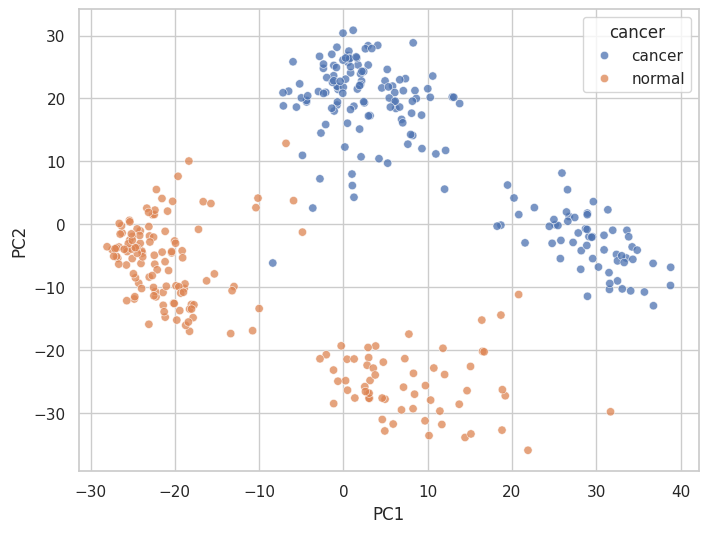

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

**Какую долю дисперсии** объясняют найденные компоненты?

In [ ]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
print(total_explained)

[0.17562213 0.32566366]


**Осуществите стандартизацию признаков** в выборке.

In [ ]:
from sklearn.preprocessing import StandardScaler


Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

**Какую долю дисперсии** объясняют найденные компоненты?

**Сделайте выводы**. Всегда ли стоит осуществлять нормализацию/стандартизацию транскриптомных данных?

#### Batch-эффект

Для неотмасштабированных данных и первых двух фичей после PCA должна была получиться картинка с 4 кластерами вместо двух. Попробуйте **отметить** на ней не только данные по классам, а также разные **типы датасетов** (столбик `Dataset` в файле `gse53625_metadata.csv`)

**Какие выводы** можно сделать?

Сделайте **проверку изменений** для обычного **PCA по первым двум компонентам** на скорректированных данных

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625_expression_corrected.csv -O ./data/gse53625_expression_corrected.csv

In [ ]:
escc_corrected = pd.read_csv("./data/gse53625_expression_corrected.csv", index_col=0)

### Задача 2: Загрузка транскриптомных данных. Исправление batch-эффекта.

В этой задаче предлагается воспользоваться пакетом [pyComBat](https://github.com/epigenelabs/pyComBat) для коррекции batch-эффекта в транскриптомных данных.

**Установите пакет pyComBat в окружение**. Для этого воспользуйтесь инструкцией на главной странице [репозитория pyComBat](https://github.com/epigenelabs/pyComBat) на GitHub.

**Разберитесь, как осуществляется коррекция batch-эффекта** в pyComBat и осуществите коррекцию.

**Сохраните полученный результат в файл** `gse53625_expression_corrected.csv`.

### Задача 3: Снижение размерности после коррекции batch-эффекта

В этой задаче предлагается сравнить результаты снижения размерности до и после коррекции batch-эффекта в транскриптомных данных.

**Загрузите датасет** `gse53625_expression_corrected.csv`.

Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

Произведите **стандартизацию данных** и повторите предыдущий пункт.

**Сделайте выводы**.